## Dataset
https://data.wprdc.org/dataset/allegheny-county-restaurant-food-facility-inspection-violations/resource/112a3821-334d-4f3f-ab40-4de1220b1a0a

This data set is a set of all of the restaurants in Allegheny County with geographic locations including zip code, size, description of use, and a "status" ranging from 0 to 7 to indicate if the restaurant is currently open.

In [25]:
import pandas as pd

restaurants_all = pd.read_csv("r.csv")


First, I remove the few restaurants that are outside of Pittsburgh and those with a value of 0 or 1 for their status, which indicates that they are closed.

In [26]:
query_mask = restaurants_all['status'] > 1
zip_mask_low = restaurants_all['zip'] > 14999.0
zip_mask_high = restaurants_all['zip'] < 16000.0
open_restaurants = restaurants_all[query_mask]
open_restaurants = open_restaurants[zip_mask_low]
open_restaurants = open_restaurants[zip_mask_high]
open_restaurants = open_restaurants[open_restaurants['zip'].notnull()]
open_restaurants.head(5)

<ipython-input-26-b236f237d444>:5: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  open_restaurants = open_restaurants[zip_mask_low]
<ipython-input-26-b236f237d444>:6: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  open_restaurants = open_restaurants[zip_mask_high]


,id,facility_name,num,street,city,state,zip,municipal,category_cd,description,...,bus_st_date,bus_cl_date,seat_count,noroom,sq_feet,status,placard_st,x,y,address
1,10781,Hill Top Lodge #151,128-30,Ormsby Ave,Pittsburgh,PA,15210.0,Mt Oliver,250,Social Club-Bar Only,...,1984-06-17,NaN,35.0,NaN,NaN,7,NaN,NaN,NaN,"128-30 Ormsby Ave Pittsburgh, PA 15210"
2,10693,The Suburban Room,3113,W Liberty Ave,Pittsburgh,PA,15216.0,Dormont,201,Restaurant with Liquor,...,1984-06-17,NaN,41.0,NaN,NaN,7,1.0,NaN,NaN,"3113 W Liberty Ave Pittsburgh, PA 15216"
3,10707,Hyd A Way Bar,NaN,Box 39,Morgan,PA,15064.0,South Fayette,201,Restaurant with Liquor,...,1987-03-01,NaN,30.0,NaN,NaN,7,NaN,NaN,NaN,"Box 39 Morgan, PA 15064"
5,10730,Aleppo Firemens Club,NaN,Weber Rd,Sewickley,PA,15143.0,Aleppo,250,Social Club-Bar Only,...,1984-06-17,NaN,75.0,NaN,NaN,7,NaN,NaN,NaN,"Weber Rd Sewickley, PA 15143"
7,10655,Ames,5775,Baptist Rd,Bethel Park,PA,15102.0,Bethel Park,212,Chain Restaurant without Liquor,...,1999-04-15,NaN,13.0,NaN,NaN,7,NaN,-80.014728,40.348882,"5775 Baptist Rd Bethel Park, PA 15102"


Then I count up the number of open restaurants within a certain zipcode by keeping track of the data in a dictionary, using the zipcode as a key and incrementing the value associated with it.

In [27]:
zipcode_counter = dict()

for row in open_restaurants.index:
    zipc = open_restaurants.loc[row, "zip"]
    
    if zipc not in zipcode_counter:
        zipcode_counter[zipc] = 1
    else:
        zipcode_counter[zipc] = zipcode_counter[zipc] + 1

zipcode_counter
zip_sorted = dict(sorted(zipcode_counter.items(), key=lambda item: item[1]))
zip_sorted

{15047.0: 1,
 15445.0: 1,
 15259.0: 1,
 15642.0: 1,
 15244.0: 1,
 15022.0: 1,
 15312.0: 1,
 15693.0: 1,
 15038.0: 1,
 15009.0: 1,
 15367.0: 1,
 15301.0: 1,
 15644.0: 1,
 15650.0: 1,
 15085.0: 1,
 15083.0: 1,
 15061.0: 1,
 15087.0: 1,
 15089.0: 1,
 15610.0: 1,
 15230.0: 2,
 15690.0: 2,
 15601.0: 2,
 15317.0: 3,
 15321.0: 3,
 15082.0: 3,
 15006.0: 3,
 15020.0: 3,
 15242.0: 3,
 15127.0: 4,
 15332.0: 4,
 15051.0: 4,
 15001.0: 4,
 15015.0: 5,
 15240.0: 5,
 15063.0: 6,
 15018.0: 6,
 15276.0: 6,
 15057.0: 7,
 15075.0: 7,
 15032.0: 7,
 15088.0: 8,
 15046.0: 8,
 15260.0: 9,
 15068.0: 10,
 15064.0: 11,
 15003.0: 11,
 15030.0: 11,
 15026.0: 12,
 15142.0: 14,
 15031.0: 15,
 15282.0: 15,
 15035.0: 17,
 15007.0: 18,
 15056.0: 20,
 15091.0: 24,
 15225.0: 27,
 15140.0: 30,
 15086.0: 30,
 15076.0: 32,
 15148.0: 34,
 15014.0: 39,
 15243.0: 41,
 15034.0: 42,
 15133.0: 42,
 15126.0: 44,
 15112.0: 47,
 15261.0: 48,
 15135.0: 50,
 15129.0: 55,
 15144.0: 57,
 15045.0: 60,
 15116.0: 67,
 15123.0: 70,
 15211.0

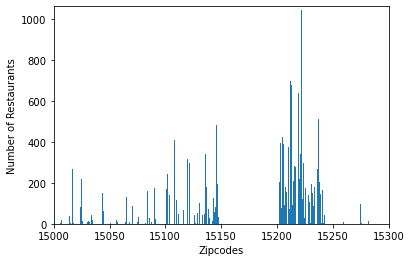

123.12949640287769


In [28]:
import matplotlib.pyplot as plt

names = list(zipcode_counter.keys())
values = list(zipcode_counter.values())

plt.bar(names, values)
plt.xlabel("Zipcodes")
plt.ylabel("Number of Restaurants")
plt.axis([15000, 15300, 0, 1060])
plt.show()

average = sum(zip_sorted.values()) / len(zip_sorted)
print(average)

Plotting this data, we find that there is a very wide range from 0 to 1041 and a mean of 124 restaurants per zipcode.

In [29]:
#all_values = zipcode_counter.values()
#max_value = max(all_values)

#print(max_value)

max_key = max(zipcode_counter, key=zipcode_counter.get)
print(max_key)

min_key = min(zipcode_counter, key=zipcode_counter.get)
print(min_key)


15222.0
15047.0


The top ten zipcodes with the most restaurants and their corresponding neighborhoods are: 
* 15222.0: 1041 - Strip District
* 15212.0: 694 - North Shore/North Side
* 15213.0: 677 - Oakland
* 15219.0: 639 - Hill District
* 15237.0: 509 - Ross Township
* 15146.0: 482 - Monroeville
* 15205.0: 423 - Crafton
* 15108.0: 408 - Coraoplis
* 15235.0: 396 - Penn Hills
* 15203.0: 392 - South Side


According to our metric, we divide the data into fifths and award points to the total of each of the zipcodes:
 
 
 
 
 
 

In [30]:
print(len(zip_sorted))

zipcode_points_restaurants = dict()
i = 1

for key in zip_sorted:
    zipcode_points_restaurants[key] = i // 28 + 1
    i = i + 1
    
zipcode_points_restaurants

139


{15047.0: 1,
 15445.0: 1,
 15259.0: 1,
 15642.0: 1,
 15244.0: 1,
 15022.0: 1,
 15312.0: 1,
 15693.0: 1,
 15038.0: 1,
 15009.0: 1,
 15367.0: 1,
 15301.0: 1,
 15644.0: 1,
 15650.0: 1,
 15085.0: 1,
 15083.0: 1,
 15061.0: 1,
 15087.0: 1,
 15089.0: 1,
 15610.0: 1,
 15230.0: 1,
 15690.0: 1,
 15601.0: 1,
 15317.0: 1,
 15321.0: 1,
 15082.0: 1,
 15006.0: 1,
 15020.0: 2,
 15242.0: 2,
 15127.0: 2,
 15332.0: 2,
 15051.0: 2,
 15001.0: 2,
 15015.0: 2,
 15240.0: 2,
 15063.0: 2,
 15018.0: 2,
 15276.0: 2,
 15057.0: 2,
 15075.0: 2,
 15032.0: 2,
 15088.0: 2,
 15046.0: 2,
 15260.0: 2,
 15068.0: 2,
 15064.0: 2,
 15003.0: 2,
 15030.0: 2,
 15026.0: 2,
 15142.0: 2,
 15031.0: 2,
 15282.0: 2,
 15035.0: 2,
 15007.0: 2,
 15056.0: 2,
 15091.0: 3,
 15225.0: 3,
 15140.0: 3,
 15086.0: 3,
 15076.0: 3,
 15148.0: 3,
 15014.0: 3,
 15243.0: 3,
 15034.0: 3,
 15133.0: 3,
 15126.0: 3,
 15112.0: 3,
 15261.0: 3,
 15135.0: 3,
 15129.0: 3,
 15144.0: 3,
 15045.0: 3,
 15116.0: 3,
 15123.0: 3,
 15211.0: 3,
 15139.0: 3,
 15204.0: 3,